## Importing libraries and data

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

#import edges list from txt file
usair="USairport_2010.txt"
graphtype=nx.MultiGraph() 
Gm = nx.read_weighted_edgelist(usair, create_using=graphtype, nodetype=int)

## Creating Graph

In [28]:
#remove duplicate edges and sum weights
G = nx.Graph()
for u,v,data in Gm.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    elif w != 0:
        G.add_edge(u, v, weight=w)

#insert labels for nodes    
nodes = pd.read_csv('USairport_2010_codes.txt',header=None,delimiter=' ')

for row in nodes.iterrows():
    G.add_node(int(row[1][0]), code=row[1][1])

#remove nodes without connections
remove = [node for node,degree in list(G.degree()) if degree == 0]
G.remove_nodes_from(remove)

#get airport code of node i by doing codes[i]
codes=nx.get_node_attributes(G,'code')

# Characterizing the Network

## Network Size

In [29]:
print('number of nodes: ', G.number_of_nodes())
print('number of nodes: ', G.number_of_edges())

number of nodes:  1574
number of nodes:  17215


## Connected Components

In [30]:
#G is the networkx graph 
sub_graphs = list(nx.connected_component_subgraphs(G))

#n gives the number of sub graphs
sub_graphs_n = len(sub_graphs)

# you can now loop through all nodes in each sub graph
for i in range(sub_graphs_n):
    print("Subgraph", i+1, "consists of ",sub_graphs[i].nodes())

Subgraph 1 consists of  [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 191, 193, 196, 198, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 249, 250

In [31]:
print("Smaller cluster consists of airports", nx.get_node_attributes(G,'code')[889], "and", nx.get_node_attributes(G,'code')[1155])
print('Weight is: ', G[889][1155]['weight'])

Smaller cluster consists of airports LCI and NY5
Weight is:  5.0


## Graph Visualization

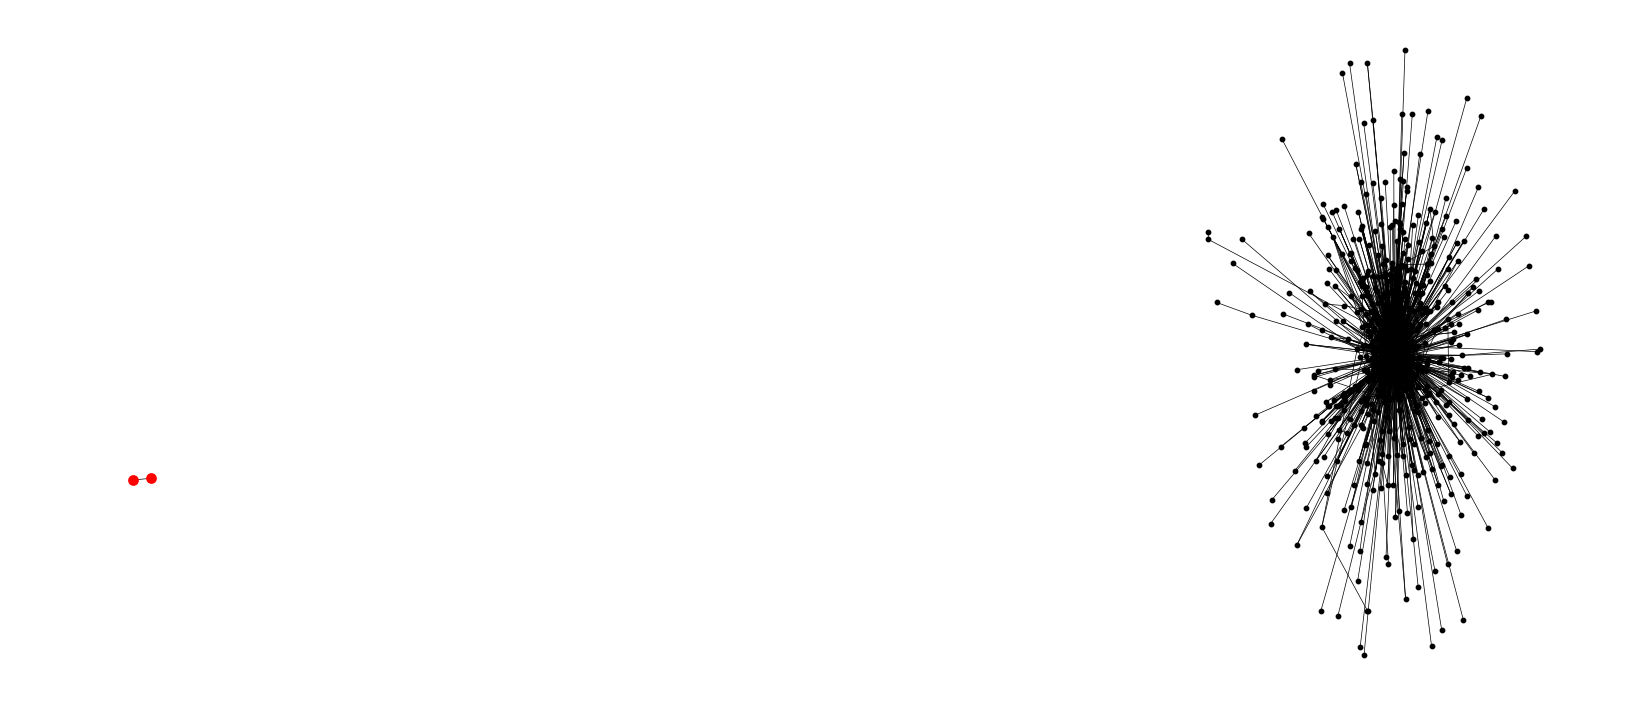

In [32]:
#positions for all nodes
pos = nx.spring_layout(G) 

#nodes
nx.draw_networkx_nodes(sub_graphs[0], pos, node_color="black", node_size=10) #large cluster
nx.draw_networkx_nodes(sub_graphs[1], pos, node_color="red", node_size=45) #small cluster

#edges
nx.draw_networkx_edges(G, pos, width=0.5)

plt.rcParams["figure.figsize"]=(20,9)
plt.rcParams['figure.dpi'] = 100
plt.axis('off')
plt.savefig('network.png')
plt.show()

## Degree Distribution

In [33]:
#powerlaw distribution
data = np.array(nx.degree_histogram(G))
xx = np.arange(len(data))

index = [i for i in range(len(data)) if data[i] != 0]

new_data = data[index]
new_data = new_data/np.sum(new_data)
new_xx = xx[index]

logx = np.log(new_xx)
logy = np.log(new_data)

coefs = np.polyfit(list(logx), list(logy), 1)
coefs

array([-1.04654065, -1.94353326])

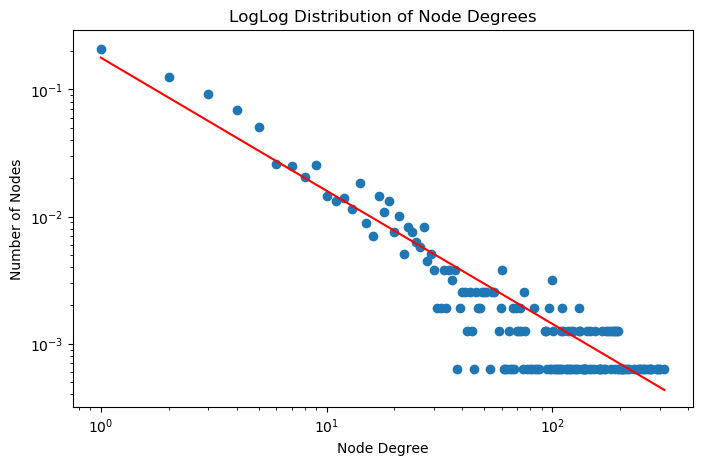

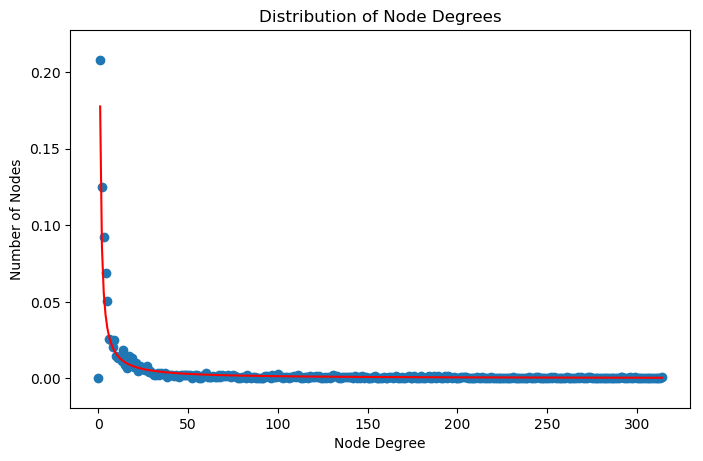

In [34]:
#plot powerlaw
xx1 = np.arange(len(data))
xx2 = np.arange(len(data)-1) + 1
yy = math.exp(coefs[1])*xx2**(coefs[0])
yy = yy/np.sum(yy)
yy2 = [np.sum(data[:i+1]) for i in range(len(data))]/np.sum(data)

plt.figure(figsize=(8,5))
plt.scatter(xx1, data/np.sum(data))
plt.loglog(xx2, yy, color="red")
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.title('LogLog Distribution of Node Degrees')
plt.savefig('loglog_degree_distribution.png')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(xx1, data/np.sum(data))
plt.plot(xx2, yy, color="r")
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Node Degrees')
plt.savefig('degree_distribution.png')
plt.show()

## Average Path Length

In [35]:
#average path length for each connected component
for g in nx.connected_component_subgraphs(G):
    print(nx.average_shortest_path_length(g))

3.1151638395019137
1.0


## Clustering Coefficient

In [36]:
#clustering coefficient
nx.average_clustering(G)

0.5041525392095766

# Characterizing the Nodes

## Degree Centrality

In [37]:
#degree centrality sorted from highest to lowest
d=nx.degree_centrality(G)
listofdegrees = sorted(d.items(),key=lambda x : x[1], reverse=True)

#print 10 airports with highest degree centrality
degcentr=[]
for i in listofdegrees[:10]:
    degcentr=degcentr+[(codes[i[0]],i[1])]
degcentr

[('ATL', 0.19961856325492688),
 ('IAD', 0.19008264462809918),
 ('ORD', 0.18817546090273363),
 ('LAX', 0.1856325492689129),
 ('JFK', 0.18499682136045772),
 ('DEN', 0.17418944691671964),
 ('EWR', 0.17355371900826447),
 ('MSP', 0.17101080737444374),
 ('IAH', 0.1697393515575334),
 ('MIA', 0.1659249841068023)]

## Eigenvector Centrality

In [38]:
#eigenvector centrality sorted from highest to lowest
e=nx.eigenvector_centrality(G,weight='weight')
listofeigen = sorted(e.items(),key=lambda x : x[1], reverse=True)

#print 10 airports with highest eigenvector centrality
eigcentr=[]
for i in listofeigen[:10]:
    eigcentr=eigcentr+[(codes[i[0]],i[1])]
eigcentr

[('ATL', 0.3187690044467078),
 ('ORD', 0.2769214117991236),
 ('LAX', 0.2731800538194448),
 ('DEN', 0.2404527852545151),
 ('DFW', 0.23896430993107087),
 ('SFO', 0.2150317282241343),
 ('LAS', 0.199829250081163),
 ('PHX', 0.19079207976568152),
 ('MCO', 0.17299473520376724),
 ('IAH', 0.16117548961444877)]

## Betweenness Centrality

In [39]:
#betweeness centrality sorted from highest to lowest
b=nx.betweenness_centrality(G,weight='weight')
listofbet = sorted(b.items(),key=lambda x : x[1], reverse=True)

#print 10 airports with highest betweeness centrality
betcentr=[]
for i in listofbet[:10]:
    betcentr=betcentr+[(codes[i[0]],i[1])]
betcentr

[('ANC', 0.24674555907235698),
 ('TEB', 0.16112408739882136),
 ('FAR', 0.1370990747634237),
 ('BUR', 0.1301233175795217),
 ('HPN', 0.11768521221438366),
 ('DLH', 0.0903262604196062),
 ('FBK', 0.08321212770365166),
 ('IAD', 0.07881182958814043),
 ('FAI', 0.07802375924189485),
 ('NUL', 0.07065670597864021)]

## Closeness Centrality

In [40]:
#closeness centrality sorted from highest to lowest
c=[]
for g in nx.connected_component_subgraphs(G):
    c=c+[nx.closeness_centrality(g)]

listofclo = sorted(c[0].items(),key=lambda x : x[1], reverse=True)

#print 10 airports with highest closeness centrality
clocentr=[]
for i in listofclo[:10]:
    clocentr=clocentr+[(codes[i[0]],i[1])]
clocentr

[('ATL', 0.49841370558375636),
 ('LAX', 0.4952711223203026),
 ('MSP', 0.49480314960629923),
 ('DEN', 0.490630855715178),
 ('IAD', 0.49001871490954463),
 ('JFK', 0.48577612863327146),
 ('MCO', 0.4856259659969088),
 ('ORD', 0.48442799876657416),
 ('EWR', 0.48190184049079754),
 ('IAH', 0.48131127450980393)]